# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

Text(0, 0.5, 'Tail Length')

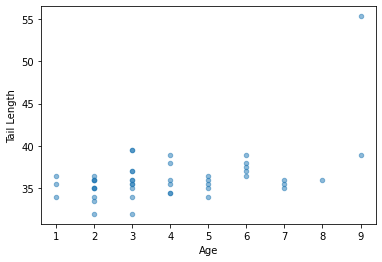

In [2]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

# Make the scatter plot (don't forget the axis labels)
ax = possum_data.plot.scatter(x = 'age', y = 'tailL', alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [3]:
def linearModelPredict(b,X):
    yp = X@b
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
linearModelPredict(b,X)
# By the way: What happens when b is a 2d-array? 
# Array Index is out of bounds



array([ 0.1, -0.2,  0.7])

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [4]:
def linearModelLossRSS(b,X,y):
    # Create the model prediction
    predY = linearModelPredict(b,X)
    # Create residuals subtract the pred from y
    residual = y - predY
    # Calc the residual some of squares
    residual_sum_of_squares = sum(residual*residual.T)
    # Calc the gradient of the loss
    gradient = -2*X.T@residual
    return (residual_sum_of_squares, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
linearModelLossRSS(b,X,y)

#To minimize the cost do you need increase or decrease the value of the parameters?
# Decrease

(2.06, array([-3.6, -4. ]))

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [5]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    betas= np.zeros((X.shape[1],1))
    # Use scipy so.miminize to optimize loss
    RESULTS = so.minimize(lossfcn,betas,args = (X,y), jac=True, method = "Powell")
    # Get the betas
    estimated_betas=RESULTS.x 
    # Calc the residuals 
    res = y - linearModelPredict(estimated_betas,X)
    # Calculate the  total sum of squares
    TSS = sum((y - y.mean())**2)
    # Caluculate the residual sums of squares (you can also use linearModelLossRSS)
    RSS = sum(res**2)
    # Compute the value for r squared
    R2 = 1 - (RSS/TSS)
    # Return values 
    return (estimated_betas,R2)

X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
linearModelFit(X,y,lossfcn = linearModelLossRSS)

C:\Users\gerri\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


(array([0.6, 0.6]), 0.75)

### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


Text(0.25, 0.8, 'R Squared: 0.22')

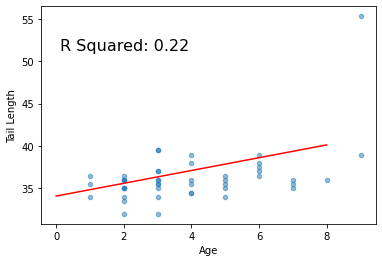

In [6]:
# Make the design matrix using np.c_ 
# y = ...
# X =  np.c_[...]
y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]
# Call your fitting function 
betas, R2 =  linearModelFit(X,y)
# Create the scatter plot (see question 1.1)
ax = possum_data.plot.scatter(x ='age', y= 'tailL', alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')
# Create a new X matrix with equally space data 
age_grid = np.array(np.linspace(1,9,9))
Xn = np.c_[np.ones(age_grid.size),age_grid]
yn = linearModelPredict(betas,Xn)
# Add the line to the graph 
ax.plot(yn, color='red')
# Report R2 
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.25, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [7]:
def linearModelLossLAD(b,X,y):
     #  Get the model prediction 
    predY = b[0] + b[1]*X[:,1]
    # Calc the residuals 
    res = y - predY
    # Calc the sign of the residuals (using np.sign)
    sres = np.sign(res)
    # Calc the sum of the absolute deviation 
    sum_abs_dev = sum(abs(res))
    # Calc the gradient 
    grad = -sum(sres*res*X[:,1])
    #return the loss and the gradient
    return (sum_abs_dev,grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
linearModelLossLAD(b,X,y)

(2.0, -2.0)

### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



[34.99966497 35.24983249 35.5        35.75016752 36.00033504 36.25050255
 36.50067007 36.75083758 37.0010051 ]


C:\Users\gerri\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


Text(0.25, 0.8, 'R Squared: 0.09')

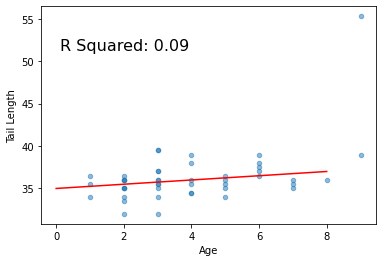

In [8]:
# Build the design matrix X by concatinating a columns using np
y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]

# Use linearModelFit to fit
betas, R2 =  linearModelFit(X,y,lossfcn = linearModelLossLAD)

# Initialize an evenly spaced vector to make predictions along a grid of equally spaced possum ages.
age_grid = np.array(np.linspace(1,9,9))

# Build a new design matrix 
Xn = np.c_[np.ones(age_grid.size),age_grid]
# Compute the predictions for the grid of ages.
yn = linearModelPredict(betas,Xn)
print(yn)
# Create a scatter plot of the data
ax = possum_data.plot.scatter(x ='age', y= 'tailL', alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Tail Length')

# Plot predicted values as a red line 
ax.plot(yn, color='red')

# From graph from using ax.annotate and return r2  
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.25, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

The LAD fit does not give as much weight to the outlier (9,55) as the OLS. The R2 value is this is because OLS minimized the RSS, and therefore maximizes R2.  

### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [9]:
from sklearn.linear_model import LinearRegression
X = np.c_[np.ones(N), age]
y = possum_data.tailL.values

In [10]:
model = LinearRegression().fit(X, y)

In [11]:
r_sq = model.score(X, y)

In [12]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.22286587947604108


In [13]:
linearModelFit(X,y,lossfcn = linearModelLossRSS)

C:\Users\gerri\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


(array([33.35046605,  0.75372837]), 0.22286587947604153)

In [14]:
# They both return similar R2 values of 0.22